Universidad Galileo

Statistical Learning I

PAPD - Sección V

Sergio José Barrios Martínez

Carnet No. 19012765

# Support Vector Machines
## Definición

Support Vector Machines (SVMs) es un algoritmo de aprendizaje supervisado, ampliamente utilizado en problemas de clasificación (tanto binaria como múltiple) y regresión. Se basa en la búsqueda de un **hiperplano** que permita separar las categorías de interés. Este *hiperplano* se determina por su distancia a cada una de las clases, específicamente, donde esta distancia es máxima. Por este motivo se dice que se fundamenta en un **clasificador marginal máximo**.

#### Hiperplano
Un hiperplano puede definirse como un sub-espacio de dimensión $(n-1)$ obtenido a partir de un espacio de dimension $n$. Por ejemplo: Un espacio de dimensión 2 (plano) tendrá un hiperplano de dimensión 1 (linea); un espacio tridimensional (cubo) tendrá como hiperplano de dimensión 2 (plano), etc. Un hiperplano puede entonces definirse de forma general como:

$\beta_0 + \beta_1*x_1 + \beta_2*x_2 + ... + \beta_n*x_n = 0$


Por ejemplo, para definir un hiperplano de 2 dimensiones, su ecuación sería:
$\beta_0 + \beta_1*x_1 + \beta_2*x_2 = 0$.
Luego, las observaciones $x_1$ y $x_2$ que satisfagan que $\beta_0 + \beta_1*x_1 + \beta_2*x_2 > 0$ pertenecerían a una categoría, y las que satisfagan que $\beta_0 + \beta_1*x_1 + \beta_2*x_2 < 0$ a otra categoría.

#### Hiperplano Separador
Del concepto anterior, puede verse que puede encontrarse una dimensión *n* en la cual las clases sean separables. Se puede entonces asignar un valor a cada clase y separar por ejemplo con una etiqueta 1 a los que estén por arriba del hiperplano y -1 a los que estén por abajo. 

<img src="./imagenes/hiperplano_separador.png">

Es decir, $\beta_0 + \beta_1*x_1 + \beta_2*x_2 > 0$ para $y=1$ y $\beta_0 + \beta_1*x_1 + \beta_2*x_2 < 0$ para $y=-1$. Es con esta idea que se generaliza la expresión para un hiperplano de separación:
- $y*(\beta_0 + \beta_1*x_1 + \beta_2*x_2) > 0$

Es debido al concepto de espacio de dimensionalidad $n$ y un hiperplano relacionado de dimensionalidad $n-1$ que las aplicaciones de SVM no se limitan únicamente a aquellos conjuntos de datos que sean separables por una linea en un dimensión dada. Existe una técnica que permite separar las categorías incluso con formas más complejas, llamada **Kernel Trick**. Esto permite proyectar los datos que no son separables en una dimensión a otra dimensión mayor donde sí lo sean. Por este motivo SVM es capaz de manejar bien múltiples dimensiones.


#### El Margen
Idealmente un hiperplano separador serviría para establecer una frontera donde sean perfectamente separables una categoría de otra. SVM serviría para encontrar este hiperplano, y el margen sería la distancia más pequeña entre los puntos de distintas clases. Sin embargo, existen escenarios donde los conjuntos no son perfectamente separables, y en este caso deberá "relajar" la restricción. Se utilizan entonces los conceptos de **Soft Margin** y **Kernel Tricks** para estos casos.
***Soft Margin*** es básicamente la misma idea que un *margin* pero que tolera que algunos puntos se pasen entre clases (errores de clasificación). **Kernel Trick** mapea el conjunto de datos en una dimensión superior para verificar si en esa dimensión puede encontrarse un hiperplano que separe las categorías. En otras palabras, se usa para encontrar fronteras de decisión no-lineales.

El grado de tolerancia determina que tan "suave" o permisivo a errores es el **Soft Margin**.


Para el caso de SVM, se busca un **hiperplano particular**: el hiperplano que tenga la distancia máxima a cada una de las clases. Para ello debe calcularse la distancia de este hiperplano al punto más cercano de cada categoría. Esto forma dos bordes (uno por clase). Los puntos de cada categoría que estén más cercanos al hiperplano definen cada uno un vector $w$ sobre el cual se calculará el producto punto (proyección de cada vector etiqueta sobre el vector $w$). 

Se busca que la diferencia entre los vectores $w$ (definido cada uno por los puntos de cada categoría más cercanos al hiperplano) sea máxima. Para eso se utilizan multiplicadores de Lagrange (método del Lagrangiano). Esto implica la utilización de gradiente de la función que define las restricciones.

El Lagrangiano en este caso tiene la forma:

<img src="./imagenes/Loss_function.png">


## Hipótesis y Función de Costo
Además de encontrar el hiperplano que separa en el espacio de n-dimensiones a las categorías, SVM debe su nombre a que se apoya en **vectores de soporte**. Estos vectores son hiperplanos localizados a cada lado el hiperplano principal. Estos vectores se construyen calculando la distancia de los elementos más cercanos al hiperplano principal (frontera de decisión).
Con estos vectores se busca lograr la mayor separación entre las clases. Esto implica un problema de optimización.

En general para cualquier algoritmo de clasificación, la hipótesis la conforman todas aquellas funciones de clasificación que se consideren en el algoritmo. Por ejemplo, en un árbol de decisión, sería las posibles combinaciones de árboles de decisión posibles. Para el caso específico primario de SVM, la función de hipótesis está dada por:

$ H_d={f(x)=sign(wTx+b); w c R^d, b c R} $

Por lo que el proceso de entrenamiento implica seleccionar un tensor $w$ y $b$ que satisfagan las condiciones.

En el caso del uso de un Kernel en SVM, se tiene una funcion $\phi:X→H$ correspondiente al Kernel. Es decir: $k(x,y)=⟨φ(x),φ(y)⟩_H$, por lo que esto da una expresión más general de la hipótesis cuando se usa un Kernel:

$H_k={f(x)=sign(⟨w,φ(x)⟩_H+b); w c H,b c R}$ y el $w$ que optimiza esta función es de la forma $w=\sum_{i=1}^{n}α_iφ(x_i)$


Debe notarse que:
$⟨w,φ(x)⟩_H=⟨\sum_{i=1}^{n}α_iφ(x_i),φ(x)⟩_H=\sum_{i=1}^{n}α_i⟨φ(x_i),φ(x)⟩_H=\sum_{i=1}^{n}α_ik(x_i,x)$,

Por lo que deben considerarse solo el conjunto de funciones restringidas a:

$H^X_k={f(x)=sign(\sum_{i=1}^{n}α_ik(x_i,x)+b)∣α∈R^n,b∈R}$.


## Hinge Loss Function
La función de costo Hinge, también conocida como función de pérdida tipo Bisagra, es una función que se utiliza para entrenamiento de algoritmos de clasificación; más específicamente en los algoritmos que buscan un "máximo margen", como Support Vector Machines.

Para comprender el sentido de una función de costo en clasificación, se considera primero el objetivo principal del algoritmo, y es poder clasificar correctamente la mayor cantidad de observaciones posible, aunque en ocasiones ocurran **ciertas clasificaciones erróneas**. Se debe entonces estimar el número de clasificaciones erróneas. Basado en esto se podrá predecir el **accuracy** del modelo y además optimizar una función de costo.

En términos simples, una función de costo general de clasificación puede escribirse como:

$Error = \frac{1}{n}\sum_{i=1}^{n}(y_i \neq sign(f(x_i)))$

Para entender intuitivamente una frontera de decisión:

<img src="./imagenes/frontera_decision.png">


Los puntos en el lado izquierdo de la gráfica están **correctamente clasificados positivos**, mientras que los de la derecha están **correctamente clasificados negativos**. Notese que si el signo de una predicción $\hat{y} = f(x)$ no corresponde con el signo de la etiqueta correcta $y$, entonces el producto $y*f(x)$ será negativo. Es decir, en la siguiente gráfica los puntos "mal clasificados" estarían en la parte izquierda, mientras que los correctamente clasificados estarían en la parte derecha:

<img src="./imagenes/misclassification.png">


Para esta gráfica entonces, a los correctamente clasificados $y*f(x)>0$ se les asigna una pérdida de 0 (ya que no se desea que contribuyan a la pérdida). Sin embargo, a los incorrectamente clasificados $y*f(x)<0$ se les asigna una pérdida de 1, es decir, que efectivamente se penalice la clasificación errónea:

<img src="./imagenes/penalizacion.png">



Es decir, para $y*f(x)>0$ la penalización es cero, mientras que para $y*f(x)<0$ la penalización incrementa. Esto lleva a la definición de la función de costo tipo bisagra **Hinge Loss Function**:

$H_0=\sum_{i=1}^{n}max[0,1-y_i*f(x_i;\theta)]$ 

El problema de optimización consiste en encontrar los parámetros $\theta$ que minimicen dicha función.



### El Kernel
Como se mencionó, el **Kernel Trick** es una herramienta para incrementar la dimensionalidad del conjunto de datos. Básicamente utiliza las características existentes en el conjunto de datos para transformarlas y crear nuevas características, con mayor dimensionalidad en la cual se pueda encontrar un hiperplano que permita hacer la separación.

Existen varios tipos de funciones Kernel conocidad como **Kernel-Trick/Basis Functions** (video 2 y video 3):

- Kernel Lineal: $k(X_1,X_2) = X_1 \cdot X_2$
- Kernel Polinomial: $k(X_1,X_2) = (\gamma X_1 \cdot X_2 + c)^d$
- Kernel Gaussiano o de Base Radial: $k(X_1,X_2) = exp(-\gamma  \| X_1 - X_2 \|^2)^d$
- Kernel Sigmoide: $k(X_1,X_2) = tanh(\gamma X_1 \cdot X_2 + c)$

<img src="./imagenes/kernel_trick.png">

La función Kernel reduce la complejidad de encontrar una función de mapeo que permita hacer la separación de clases y además, define el producto punto en el nuevo espacio de mayor dimensionalidad.

### Diferencias con otros Modelos de Clasificación:

##### Regresión:
Los algoritmos de regresión utilizados en clasificación encuentran una linea que permita separar las categorías de interés, por medio de un proceso de optimización sobre una función de costo. El algoritmo de SVM's permite extrapolar esta búsqueda a varias dimensiones (hiperplano) y se busca una división que tenga la mayor separación posible a cada categoría. Por este motivo el comportamiento de la función de pérdida es distinto:

<img src="./imagenes/classificationlosses.png">

En términos generales, la regresión logística se acerca más lentamente a cero, mientras que la función Hinge llega a ser cero. Debido al comportamiento asintótico de la pérdida en la regresión logística, es más suceptible a la divergencia.

##### KNN:
Este algoritmo de clasificación puede clasificar datos distribuidos linealmente y no linealmente. Esto es independiente de la selección de sus hiperparámetros. En SVMs pueden clasificarse datos distribuidos de forma no lineal por medio de la selección adecuada del Kernel (Kernel Trick). Ambos son sin embargo computacionalmente costosos si existe una gran cantidad de datos. La diferencia principal es que KNN es muy susceptible a **outliers** que pueden provocar clasificaciones erróneas, a diferencia de SVM.


### Ventajas de SVM
- Capacidad de clasificar categorías de datos que se encuentren en múltiples dimensiones.
- Es adecuado para clasificación binaria.
- Encuentra fronteras de decisión no lineales y con formas complejas, sin necesidad de hacer Featuring Engineering (utilizando el incremento de dimensionalidad de los datos con Kernel Trick).


### Desventajas
- Puede llegar a ser computacionalmente costoso cuando se implementa Kernel Trick sobre los datos.
- Dependiendo de los datos disponibles, se requiere una buena elección de Kernel para que funcione adecuadamente.
- Si el conjunto de datos es grande, el entrenamiento puede ser tardado o computacionalmente costoso.
- No provee información sobre probabilidades.
- No funciona muy bien con clases superpuestas.

https://towardsdatascience.com/support-vector-machine-simply-explained-fee28eba5496

https://slideplayer.com/slide/3397099/

### Ejemplo en TensorFlow

El siguiente ejemplo muestra el algoritmo de SVM con Regularización L2 en su forma primaria (tomado del último video):

<img src="./imagenes/Loss_function.png">

donde: 

<img src="./imagenes/Dominio.png">

La primera parte de la función de costo es el término de regularización, que se muestra en el código como **regularization_loss**, mientras que la función de costo se muestra como **hinge_loss**.



In [92]:
import tensorflow as tf
if tf.__version__.startswith("2."):
  import tensorflow.compat.v1 as tf
  tf.compat.v1.disable_v2_behavior()
  tf.compat.v1.disable_eager_execution()
  print("Enabled compatitility to tf1.x")
import numpy as np
import datetime
import scipy.io as io
from matplotlib import pyplot as plt
import plot_boundary_on_data

Enabled compatitility to tf1.x


In [93]:
# Función para extraer el conjunto de datos ejemplo de la forma:
# etiqueta, x_0, x_1, ... , x_n a partir de un archivo .csv
def extract_data(filename):

    out = np.loadtxt(filename, delimiter=',');

    # Se construyen los arreglos de "etiquetas" y "features"
    labels = out[:,0]
    labels = labels.reshape(labels.size,1)
    fvecs = out[:,1:]

    # Matriz de Features y Etiquetas
    return fvecs,labels

### Definición del Grafo SVM

In [94]:
grafo = tf.Graph()

with grafo.as_default():  
   
    # Placeholders
    x = tf.placeholder(tf.float32, shape=[None, 2],name="tensor_x") # Placeholder de Matriz de Features
    y = tf.placeholder(tf.float32, shape=[None,1],name="tensor_y") # Placeholder de Etiquetas.
    batch_size = tf.placeholder(tf.int32,name="batch_size") # Hiper-parámetro de Tamaño del Mini-Batch
    svmC = tf.placeholder(tf.float32,name="factor_regularizacion") # Hiper-parámetro de Factor de Regularización C

    # Parámetros Entrenables del Modelo 
    W = tf.Variable(tf.zeros([2,1]),name="W")
    b = tf.Variable(tf.zeros([1]),name="b")
    
    # Cálculo vectorizado del Modelo Y = x*W + b
    with tf.name_scope("modelo_lineal"):
        y_raw = tf.matmul(x,W) + b

    # Optimización
    with tf.name_scope("error_modelo"):
        regularization_loss = 0.5*tf.reduce_sum(tf.square(W)) 
        hinge_loss = tf.reduce_sum(tf.maximum(tf.zeros([batch_size,1]),1 - y*y_raw))
        svm_loss = regularization_loss + svmC*hinge_loss
        error_summary = tf.summary.scalar("error",svm_loss)
        
    with tf.name_scope("optimizacion"):    
        train_step = tf.train.GradientDescentOptimizer(0.01).minimize(svm_loss)

    # Predicciones
    with tf.name_scope("predicciones"):
        predicted_class = tf.sign(y_raw);
        correct_prediction = tf.equal(y,predicted_class)
    
    # Evaluación    
    with tf.name_scope("accuracy"):    
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
        exactitud_summary = tf.summary.scalar("accuracy",accuracy)

    init = tf.global_variables_initializer()

<img src="./imagenes/Grafo.png">

### Entrenamiento

In [95]:
def entrenamiento(verbose,plot,epochs,tamaño_batch,Factor_C):   
    
    now = datetime.datetime.now()
    
    # Lectura de Datos desde Archivo *.csv
    train_data_filename = ".\linearly_separable_data.csv"

    # Obtención de Matrices de Numpy
    train_data,train_labels = extract_data(train_data_filename)

    # Se convierten las etiquetas a +1,-1
    train_labels[train_labels==0] = -1

    # Shape de los datos de entrenamiento
    train_size,num_features = train_data.shape

    # Número de epochs para el entrenamiento
    num_epochs =epochs

    tf.reset_default_graph()
    
    # Sesión de Ejecución.
    with tf.Session(graph=grafo) as s:
        
        
        # String de Configuración 
        #("Año""Mes""Dia"-"Hora""Minuto""Segundo"-"lr=""valor Learning Rate"-"it=""iteracion")
        writer = tf.summary.FileWriter('./graphs/'+now.strftime("%Y%m%d-%H%M%S")+'-fr='+str(Factor_C) \
                                       +'-epochs='+str(epochs)+'-bs='+str(tamaño_batch), s.graph)
        
        # Se inicializan las variables
        tf.initialize_all_variables().run()
        
        
        # Entrenamiento:
        for step in range(num_epochs * train_size // tamaño_batch):
                
            offset = (step * tamaño_batch) % train_size
            batch_data = train_data[offset:(offset + tamaño_batch), :]
            batch_labels = train_labels[offset:(offset + tamaño_batch)]
            feed_dict={x: batch_data, y: batch_labels, batch_size:tamaño_batch, svmC:Factor_C}
            train_step.run(feed_dict=feed_dict)
    
            # Escalar del Error SVM
            svm_error_summary = s.run(error_summary,feed_dict=feed_dict)
            writer.add_summary(svm_error_summary, step)
            
            # Escalar del Accuracy
            accuracy_summary = s.run(exactitud_summary,feed_dict=feed_dict)
            writer.add_summary(accuracy_summary, step)
    
            
        # Información de Pasos.
        if verbose:
            print ()
            print ('Matriz de Pesos')
            print (s.run(W))
            print ()
            print ('Vector del Sesgo (Intercepto b).')
            print (s.run(b))
            print ()
            print ("Aplicando el modelo:")
            print ()
            
        print ("Accuracy del entrenamiento:", accuracy.eval(feed_dict=feed_dict))

        # Gráfica de Separación de Clases
        eval_fun = lambda X: predicted_class.eval(feed_dict={x:X}); 
        plot_boundary_on_data.plot(train_data, train_labels, eval_fun)
        
    return


Matriz de Pesos
[[-0.4821041 ]
 [-0.50810534]]

Vector del Sesgo (Intercepto b).
[3.7252903e-09]

Aplicando el modelo:

Accuracy del entrenamiento: 0.6


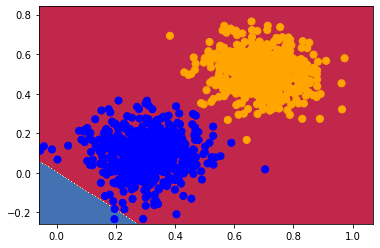

In [100]:
# Experimento No. 1
# Epochs: 10, Batch Size: 10, Factor Regularización: 0.25
entrenamiento(1,1,10,10,0.25)


Matriz de Pesos
[[-0.95468765]
 [-1.0091215 ]]

Vector del Sesgo (Intercepto b).
[0.50000054]

Aplicando el modelo:

Accuracy del entrenamiento: 0.8


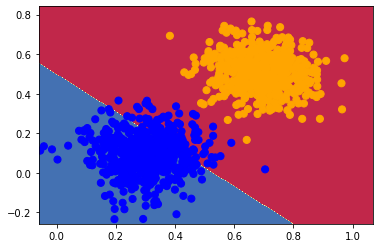

In [97]:
# Experimento No. 2
# Epochs: 10, Batch Size: 10, Factor Regularización: 0.5
entrenamiento(1,1,10,10,0.5)


Matriz de Pesos
[[-1.6747146]
 [-1.7303789]]

Vector del Sesgo (Intercepto b).
[1.3500007]

Aplicando el modelo:

Accuracy del entrenamiento: 1.0


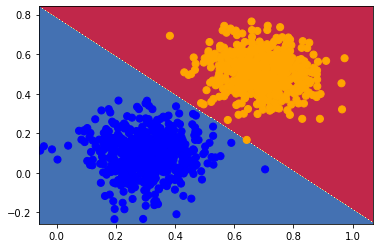

In [98]:
# Experimento No. 3
# Epochs: 10, Batch Size: 10, Factor Regularización: 1.0
entrenamiento(1,1,10,10,1)


Matriz de Pesos
[[-2.401438 ]
 [-2.5256789]]

Vector del Sesgo (Intercepto b).
[1.9500078]

Aplicando el modelo:

Accuracy del entrenamiento: 1.0


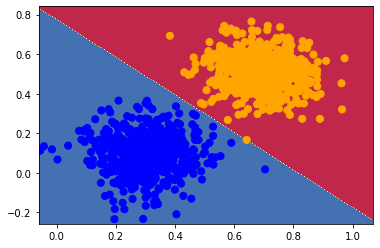

In [99]:
# Experimento No. 4
# Epochs: 10, Batch Size: 10, Factor Regularización: 3
entrenamiento(1,1,10,10,3)

### Error y Métrica de Evaluación

Se muestra el registro de errores y la métrica de evaluación Accuracy en cada experimento:

<img src="./imagenes/Error.png">
<img src="./imagenes/Accuracy.png">